In [2]:
import os

import pandas as pd

In [94]:
def print_distribution(name, samples):
    data = pd.read_csv(os.path.join(data_dir, '{}.csv'.format(name)), header=None)
    distribution = dict()
    for index, row in samples.iterrows():
        indices = row.values.tolist()
        classes = data.iloc[indices, -1].value_counts()
        for class_name, class_dist in classes.iteritems():
            if class_name not in distribution:
                distribution[class_name] = 0
            distribution[class_name] += class_dist
    total = sum(distribution.values())
    
    org_distribution = dict()
    df = data.iloc[:,-1].value_counts()
    for class_name, class_dist in df.iteritems():
        if class_name not in org_distribution:
            org_distribution[class_name] = 0
        org_distribution[class_name] += class_dist * n
    
    df1 = pd.DataFrame(distribution, index=['sampled'])
    df2 = pd.DataFrame(org_distribution, index=['original'])
    df = pd.concat([df1, df2])
    df.plot.barh(stacked=True)
    
    print('{} {} Total across samples: {} Total in dataset: {} Ratio: {:.0f}/{}'.format(name, distribution, total, data.shape[0], total/data.shape[0], n))

In [6]:
n = 10  #number of bootstrap samples per dataset

In [7]:
data_dir = os.path.join('..', 'data', 'ordinal', 'csv')

# Weights set to 1.0

In [9]:
sampling_dir = os.path.join('..', 'results', 'sampling')
samples_by_dataset = dict()
for file in os.listdir(sampling_dir):
    path = os.path.join(sampling_dir, file)
    df = pd.read_csv(path, header=None)
    name = file.replace('.csv', '')
    samples_by_dataset[name] = df

housing {3: 1310, 1: 1270, 4: 1240, 2: 1240} Total across samples: 5060 Total in dataset: 506 Ratio: 10/10
ERA_n {3: 1810, 4: 1720, 5: 1580, 2: 1420, 6: 1180, 1: 920, 7: 880, 8: 310, 9: 180} Total across samples: 10000 Total in dataset: 1000 Ratio: 10/10
breast-w {'benign': 4580, 'malignant': 2410} Total across samples: 6990 Total in dataset: 699 Ratio: 10/10
ESL_n {6: 1350, 5: 1160, 4: 1000, 7: 620, 3: 380, 8: 190, 2: 120, 9: 40, 1: 20} Total across samples: 4880 Total in dataset: 488 Ratio: 10/10
dataset3 {3: 3570, 4: 3080, 2: 2960, 1: 2430, 5: 1240} Total across samples: 13280 Total in dataset: 1328 Ratio: 10/10
windsor {1: 1380, 0: 1370, 2: 1360, 3: 1350} Total across samples: 5460 Total in dataset: 546 Ratio: 10/10
balance_scale {'L': 2880, 'R': 2880, 'B': 490} Total across samples: 6250 Total in dataset: 625 Ratio: 10/10
breast-w_nm {'benign': 4580, 'malignant': 2410} Total across samples: 6990 Total in dataset: 699 Ratio: 10/10
LEV_n {2: 4030, 1: 2800, 3: 1970, 0: 930, 4: 270} T

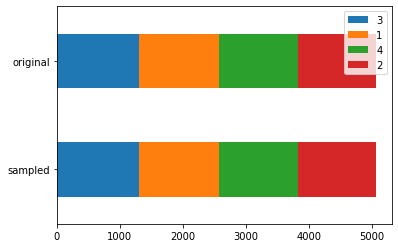

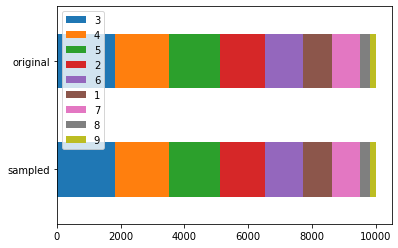

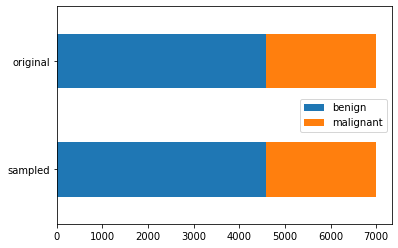

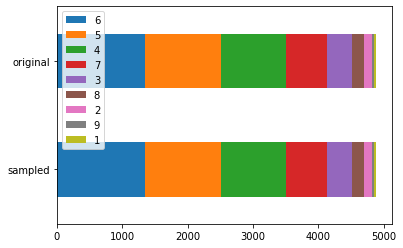

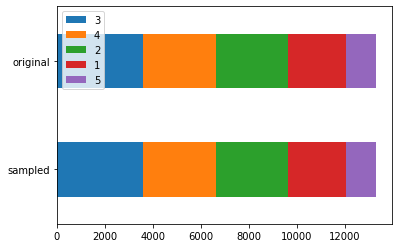

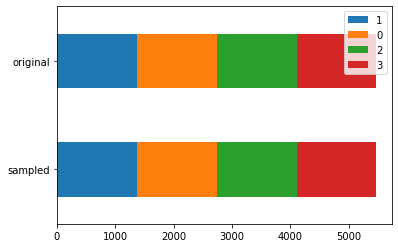

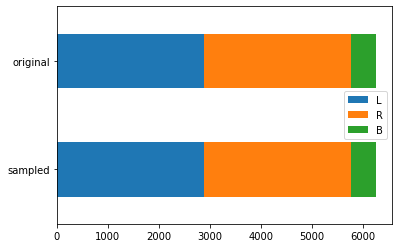

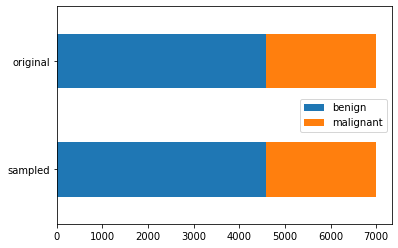

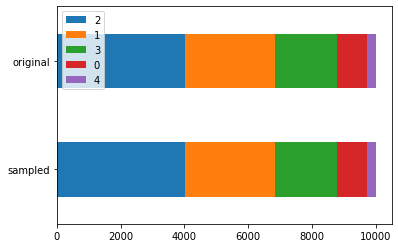

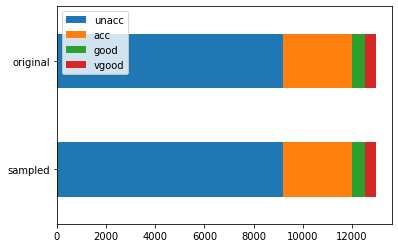

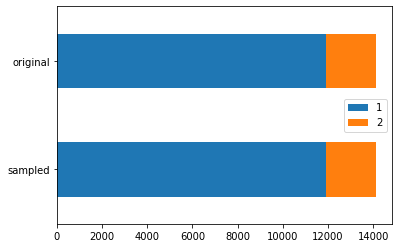

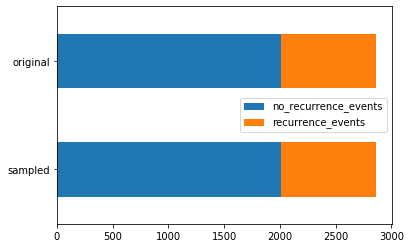

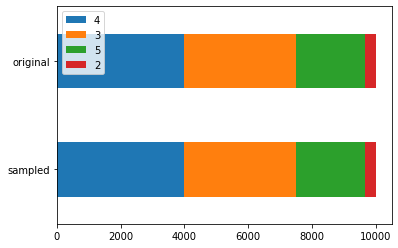

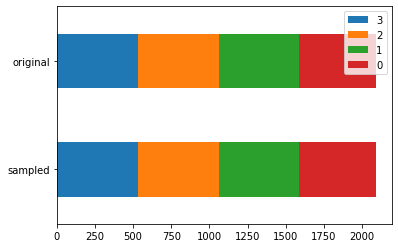

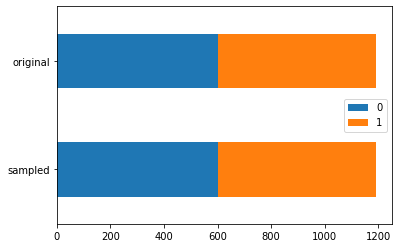

In [102]:
%matplotlib inline
for name, df in samples_by_dataset.items():
    print_distribution(name, df)

# Weights set according to class size
Each example's weight is set to ```min_class_size / current_example_class_size```

Bootstrap size equal to dataset size.

In [103]:
balanced_sampling_dir = os.path.join('..', 'results', 'balanced_sampling')
balanced_samples_by_dataset = dict()
for file in os.listdir(balanced_sampling_dir):
    path = os.path.join(balanced_sampling_dir, file)
    df = pd.read_csv(path, header=None)
    name = file.replace('.csv', '')
    balanced_samples_by_dataset[name] = df

housing {4: 1289, 1: 1251, 3: 1263, 2: 1257} Total across samples: 5060 Total in dataset: 506 Ratio: 10/10
ERA_n {3: 1093, 6: 1086, 8: 1114, 1: 1103, 9: 1114, 4: 1085, 7: 1096, 2: 1098, 5: 1211} Total across samples: 10000 Total in dataset: 1000 Ratio: 10/10
breast-w {'malignant': 3727, 'benign': 3263} Total across samples: 6990 Total in dataset: 699 Ratio: 10/10


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



ESL_n {2: 567, 9: 549, 8: 580, 6: 544, 1: 534, 3: 514, 5: 548, 4: 523, 7: 521} Total across samples: 4880 Total in dataset: 488 Ratio: 10/10
dataset3 {1: 2950, 2: 2743, 3: 2605, 5: 2480, 4: 2502} Total across samples: 13280 Total in dataset: 1328 Ratio: 10/10
windsor {0: 1372, 1: 1369, 2: 1365, 3: 1354} Total across samples: 5460 Total in dataset: 546 Ratio: 10/10
balance_scale {'L': 1986, 'B': 2116, 'R': 2148} Total across samples: 6250 Total in dataset: 625 Ratio: 10/10
breast-w_nm {'malignant': 3732, 'benign': 3258} Total across samples: 6990 Total in dataset: 699 Ratio: 10/10
LEV_n {2: 1994, 4: 2042, 0: 1987, 3: 2047, 1: 1930} Total across samples: 10000 Total in dataset: 1000 Ratio: 10/10
car {'unacc': 3418, 'acc': 3270, 'vgood': 3146, 'good': 3126} Total across samples: 12960 Total in dataset: 1296 Ratio: 10/10
dataset1_noid {1: 7570, 2: 6540} Total across samples: 14110 Total in dataset: 1411 Ratio: 10/10
breast-cancer_nm {'no_recurrence_events': 1397, 'recurrence_events': 1463}

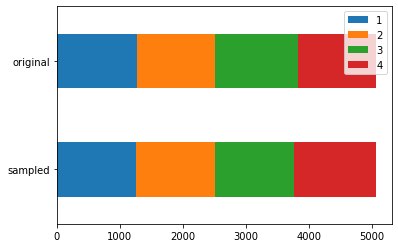

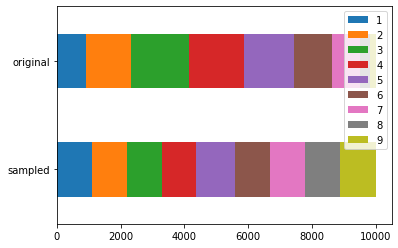

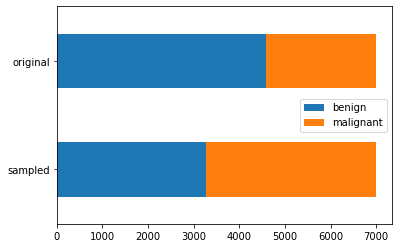

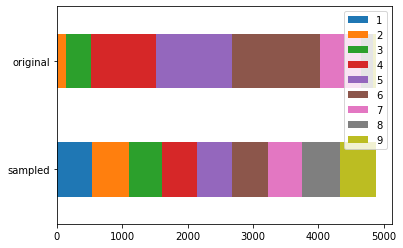

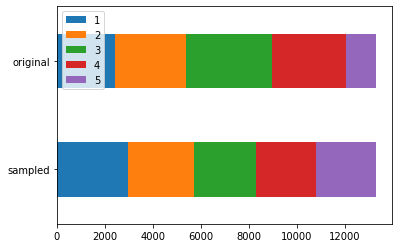

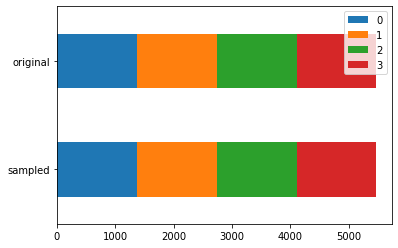

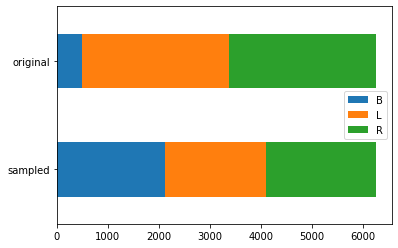

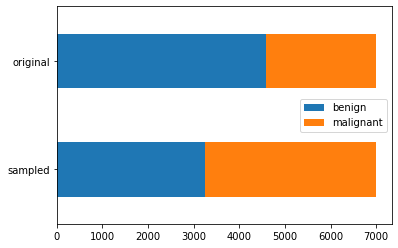

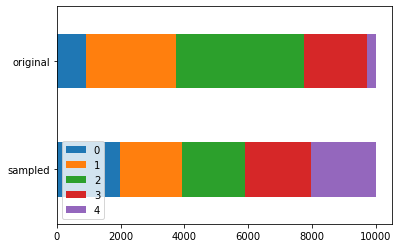

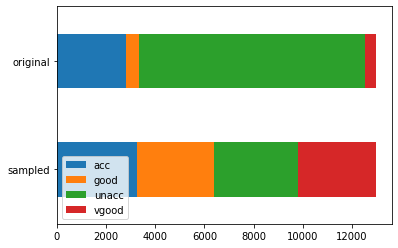

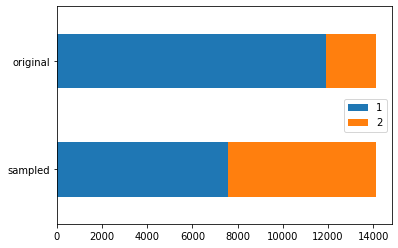

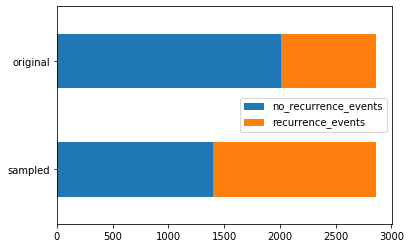

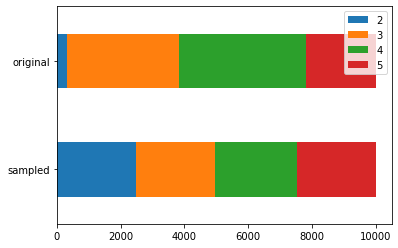

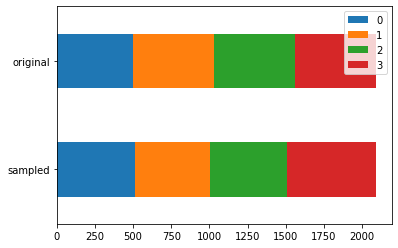

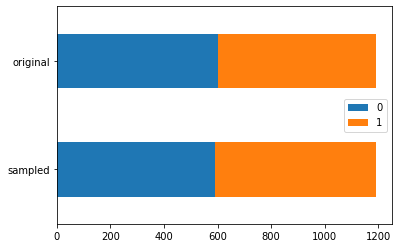

In [104]:
%matplotlib inline
for name, df in balanced_samples_by_dataset.items():
    print_distribution(name, df)

# Amended bootstrap size
Bootstra

In [109]:
balanced_undersampling_dir = os.path.join('..', 'results', 'balanced_undersampling')
balanced_under_samples_by_dataset = dict()
for file in os.listdir(balanced_undersampling_dir):
    path = os.path.join(balanced_undersampling_dir, file)
    df = pd.read_csv(path, header=None)
    name = file.replace('.csv', '')
    balanced_under_samples_by_dataset[name] = df

housing {3: 1241, 4: 1240, 2: 1239, 1: 1240} Total across samples: 4960 Total in dataset: 506 Ratio: 10/10
ERA_n {3: 179, 1: 160, 2: 192, 8: 202, 5: 173, 9: 190, 6: 162, 7: 167, 4: 195} Total across samples: 1620 Total in dataset: 1000 Ratio: 2/10
breast-w {'benign': 2419, 'malignant': 2401} Total across samples: 4820 Total in dataset: 699 Ratio: 7/10
ESL_n {4: 25, 9: 18, 5: 24, 3: 27, 2: 16, 1: 20, 8: 13, 7: 16, 6: 21} Total across samples: 180 Total in dataset: 488 Ratio: 0/10
dataset3 {4: 1283, 3: 1198, 2: 1282, 1: 1302, 5: 1135} Total across samples: 6200 Total in dataset: 1328 Ratio: 5/10
windsor {1: 1355, 2: 1353, 0: 1353, 3: 1339} Total across samples: 5400 Total in dataset: 546 Ratio: 10/10
balance_scale {'R': 536, 'B': 487, 'L': 447} Total across samples: 1470 Total in dataset: 625 Ratio: 2/10
breast-w_nm {'benign': 2397, 'malignant': 2423} Total across samples: 4820 Total in dataset: 699 Ratio: 7/10


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



LEV_n {1: 268, 4: 275, 3: 238, 2: 299, 0: 270} Total across samples: 1350 Total in dataset: 1000 Ratio: 1/10
car {'unacc': 480, 'good': 442, 'vgood': 441, 'acc': 437} Total across samples: 1800 Total in dataset: 1296 Ratio: 1/10
dataset1_noid {2: 2147, 1: 2213} Total across samples: 4360 Total in dataset: 1411 Ratio: 3/10
breast-cancer_nm {'no_recurrence_events': 846, 'recurrence_events': 854} Total across samples: 1700 Total in dataset: 286 Ratio: 6/10
SWD_n {3: 331, 2: 321, 4: 314, 5: 314} Total across samples: 1280 Total in dataset: 1000 Ratio: 1/10
cpu {1: 497, 3: 512, 2: 498, 0: 493} Total across samples: 2000 Total in dataset: 209 Ratio: 10/10
denbosch {1: 592, 0: 588} Total across samples: 1180 Total in dataset: 119 Ratio: 10/10


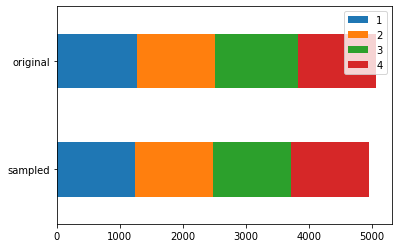

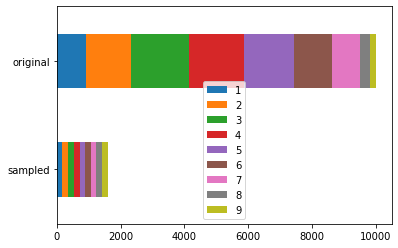

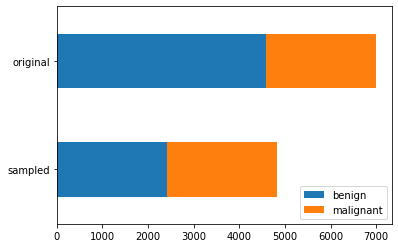

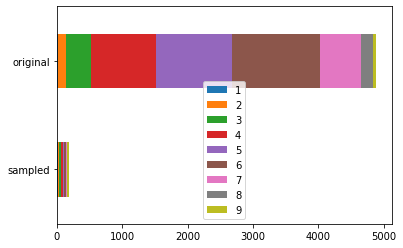

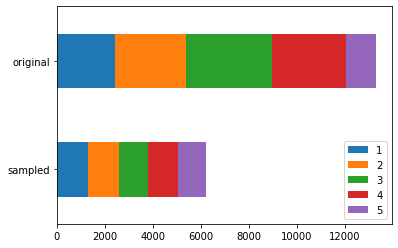

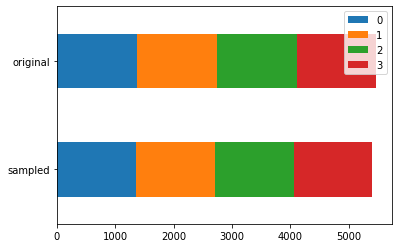

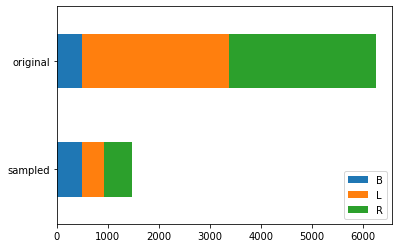

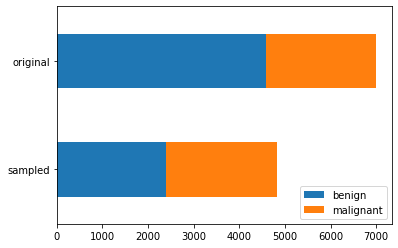

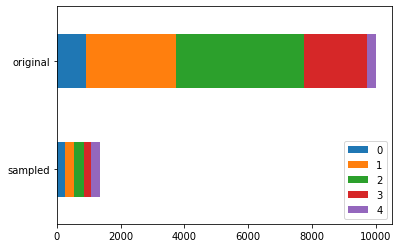

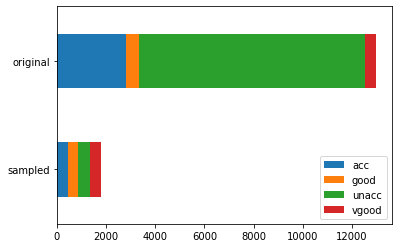

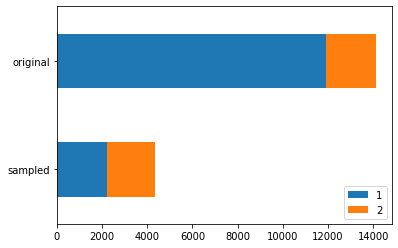

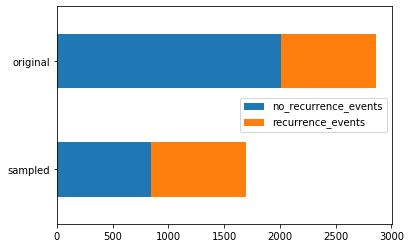

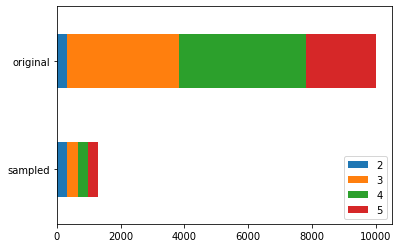

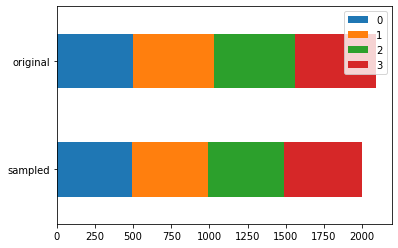

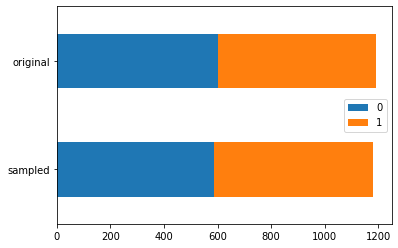

In [110]:
%matplotlib inline
for name, df in balanced_under_samples_by_dataset.items():
    print_distribution(name, df)